In [12]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#'''
font = {'weight' : 'medium',
       'size'   : 25}
mpl.rc('font', **font)
#'''

In [8]:
#QoE_week = pd.read_csv('../Data/QoE_User_wdays.csv')
QoE_week = pd.read_csv('../Data/UserPerf_new/agg_wdays/QoE_User_wdays.csv')
QoE_wends = pd.read_csv('../Data/QoE_User_wends.csv')

QoE_week=QoE_week.dropna()
QoE_wends=QoE_wends.dropna()

QoE_week.columns = ['uid', 'IMD', 'drop_3g', 'drop_4g', 'lat_3g', 'lat_4g', 'bytes_3g', 'bytes_4g', 'bytes_all']
QoE_wends.columns = ['uid', 'IMD', 'drop_3g', 'drop_4g', 'lat_3g', 'lat_4g', 'bytes_3g', 'bytes_4g', 'bytes_all']

QoE_week['IMD'] = QoE_week['IMD'].astype(int)
QoE_week.head()

,uid,IMD,drop_3g,drop_4g,lat_3g,lat_4g,bytes_3g,bytes_4g,bytes_all
0,+97QEeVwz92jooyEKM8kbbYBBZIPpQ4BF+FCkG3snac=,9,0.696727,0.644039,157.589543,83.594676,1.700304e+05,2.379596e+06,2.597962e+06
1,/yFkOu3m+VtM8SSuCkuMqn/EhBh4Tx+y+Tgbmpj/XIQ=,7,0.553118,0.236087,264.461920,143.495079,1.755440e+06,7.991475e+06,1.004089e+07
2,6cbFF03MxMLoTGIX5fpohJY9MlZYDAUkY2VEIpjdWpg=,10,0.934452,0.180765,146.438705,39.238266,1.548732e+03,1.359575e+06,1.444188e+06
3,ANkN2VR1XCTYscsPK7p1O/LuL33wkZ/cqeJib/hCzJo=,8,1.662982,0.851663,373.686861,158.728371,1.640234e+05,9.504778e+05,1.139695e+06
4,J4M8VqR2IYef0F5/B1yBBDdUJlaCNfHDiVYOP+tGiHo=,5,0.123706,0.190176,313.875000,127.499801,6.333945e+04,2.598297e+06,2.868341e+06


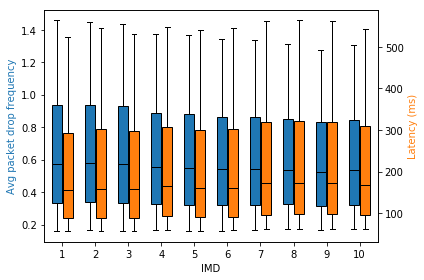

In [4]:
from matplotlib import pyplot as plt
import numpy as np

rainfall = []
floods = []

for i in range(1, 11):
    rainfall.append(QoE_week[QoE_week['IMD'] == i]['drop_3g'])
    floods.append(QoE_week[QoE_week['IMD'] == i]['lat_3g'])
fig, ax1 = plt.subplots()

ax1.set_xlabel('IMD')
ax1.set_ylabel('Avg packet drop frequency', color='tab:blue')
res1 = ax1.boxplot(
    rainfall, positions = np.arange(10)-0.17, widths=0.3,
    patch_artist=True, showfliers=False, whis=[10,90]
)
#res1 = rainfall.boxplot(column='drop_4g', by='IMD', showfliers=False, whis=[10,90], 
#                 positions = np.arange(10)-0.25, widths=0.4,patch_artist=True, ax=ax1)
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(res1[element], color='k')

for patch in res1['boxes']:
    patch.set_facecolor('tab:blue')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Latency (ms)', color='tab:orange')
res2 = ax2.boxplot(
    floods, positions = np.arange(10)+0.17, widths=0.3,
    patch_artist=True, showfliers=False, whis=[10,90]
)
#floods.boxplot(column='lat_4g', by='IMD', showfliers=False, whis=[10,90], 
#                 positions = np.arange(10)-0.25, widths=0.4,patch_artist=True, ax=ax2)
##from https://stackoverflow.com/a/41997865/2454357
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(res2[element], color='k')

for patch in res2['boxes']:
    patch.set_facecolor('tab:orange')

ax1.set_xlim([-0.55, 9.55])
ax1.set_xticks(np.arange(10))
ax1.set_xticklabels(range(1, 11))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

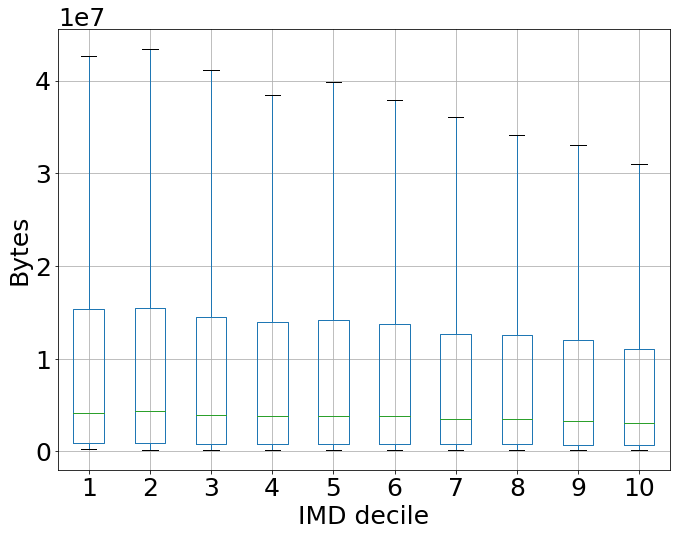

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

ax = QoE_week.boxplot(column='bytes_4g', by='IMD', showfliers=False, whis=[10,90], ax=ax)

#ax.set_ylim([0, 1.05])
plt.suptitle("")
plt.title("")
ax.set_xlabel('IMD decile')
ax.set_ylabel('Bytes')
#plt.ylabel('')
plt.tight_layout()
plt.show()

Text(0,0.5,'$p$')

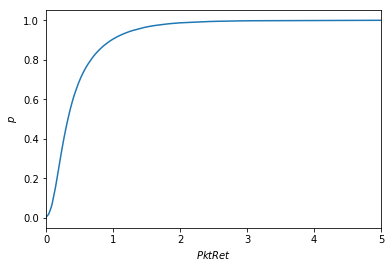

In [10]:
measures = np.array(QoE_week['drop_4g'].tolist())

measures_sorted = np.sort(measures)

p = 1. * np.arange(len(measures)) / (len(measures) - 1)

fig, ax = plt.subplots()

ax.plot(measures_sorted, p)
ax.set_xlim([0, 5])
ax.set_xlabel('$Pkt Ret$')
ax.set_ylabel('$p$')

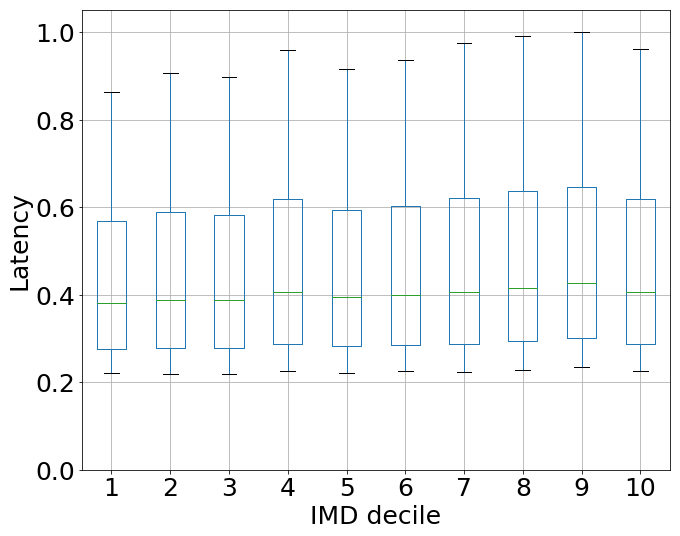

185.3743758878049


In [30]:
max_90p = 0

for imd_id in range(1, 11):
    imd_90p = QoE_week[QoE_week['IMD'] == imd_id ]['lat_4g'].quantile(q=0.9)
    if max_90p < imd_90p:
        max_90p = imd_90p

#QoE_week['lat_4g_norm'] = QoE_week['lat_4g'].divide(QoE_week['lat_4g'].quantile(q=0.9))
QoE_week['lat_4g_norm'] = QoE_week['lat_4g'].divide(max_90p)

fig, ax = plt.subplots(figsize=(10,8))

ax = QoE_week.boxplot(column='lat_4g_norm', by='IMD', showfliers=False, whis=[10,90], ax=ax)

ax.set_ylim([0, 1.05])
plt.suptitle("")
plt.title("")
ax.set_xlabel('IMD decile')
ax.set_ylabel('Latency')
plt.tight_layout()
plt.show()

print(max_90p)

Text(0,0.5,'$p$')

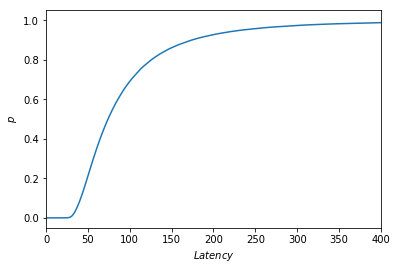

In [14]:
measures = np.array(QoE_week['lat_4g'].tolist())

measures_sorted = np.sort(measures)

p = 1. * np.arange(len(measures)) / (len(measures) - 1)

fig, ax = plt.subplots()

ax.plot(measures_sorted, p)
ax.set_xlim([0, 400])
ax.set_xlabel('$Latency$')
ax.set_ylabel('$p$')

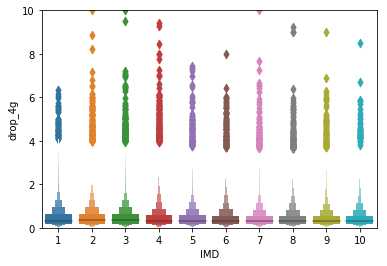

In [7]:
ax = sns.boxenplot(data=QoE_week, x='IMD', y='drop_3g')
ax.set_ylim([0, 10])
plt.show()

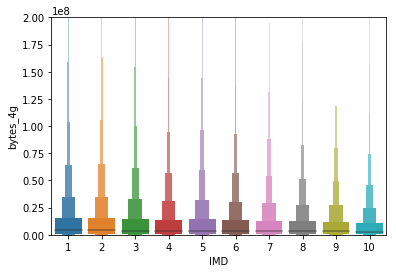

In [12]:
ax = sns.boxenplot(data=QoE_week, x='IMD', y='bytes_4g')
ax.set_ylim([0, 200000000])
plt.show()

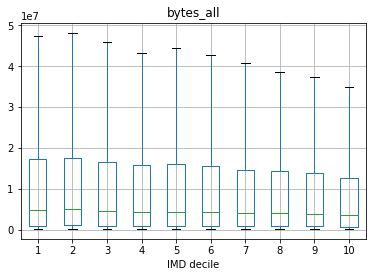

In [8]:
#ax = sns.boxplot(data=QoE_week, x='IMD', y='bytes_all')
QoE_week.boxplot(column='bytes_all', by='IMD', showfliers=False, whis=[10,90])

#ax.set_ylim([0, 200000000])
#plt.title("Boxplot of Something")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.xlabel('IMD decile')
#plt.ylabel('')
plt.show()

In [23]:
QoE_week['bytes_4g_ratio'] = QoE_week['bytes_4g'] / QoE_week['bytes_all']
QoE_week=QoE_week.rename(columns = {'bytes_4g_ratio':'4G consumption ratio'})

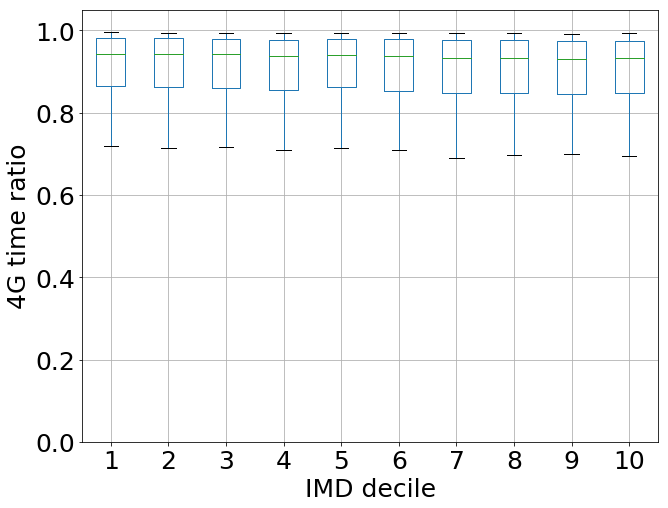

In [28]:
fig, ax = plt.subplots(figsize=(10,8))

ax = QoE_week.boxplot(column='4G consumption ratio', by='IMD', showfliers=False, whis=[10,90], ax=ax)



ax.set_ylim([0, 1.05])
#plt.title("Boxplot of Something")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")
plt.title("")
plt.xlabel('IMD decile')
plt.ylabel('4G time ratio')
#plt.ylabel('')
plt.show()

In [23]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

QoE_week=QoE_week.rename(columns = {'4G consumption ratio': 'bytes_4g_ratio'})

anova_results = ols('lat_4g ~ C(IMD)', data=QoE_week).fit()
anova_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lat_4g   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     139.1
Date:                Fri, 10 May 2019   Prob (F-statistic):          1.09e-263
Time:                        12:58:24   Log-Likelihood:            -5.9200e+06
No. Observations:              997265   AIC:                         1.184e+07
Df Residuals:                  997255   BIC:                         1.184e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       92.1958      0.403    228.788      0.000      91.406      92.986
C(IMD)[T.2]      2.7914      0.478      5.837      0.000       1.854       3.729
C(IMD)[T.3]      2.6121      0.466      5.606      0.000       1.699       3.525
C(IMD)[T.4]      7.7590      0.466     16.662      0.000       6.846       8.672
C(IMD)[T.5]      4.1662      0.494      8.426      0.000       3.197       5.135
C(IMD)[T.6]      5.6625      0.500     11.326      0.000       4.683       6.642
C(IMD)[T.7]      7.7954      0.500     15.578      0.000       6.815       8.776
C(IMD)[T.8]      9.9356      0.498     19.960      0.000       8.960      10.911
C(IMD)[T.9]     12.0634      0.521     23.147      0.000      11.042      13.085
C(IMD)[T.10]     7.5559      0.596     12.677      0.000       6.388       8.724
==============================================================================
Omnibus:                  2019189.194   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      68495348059.943
Skew:                          15.810   Prob(JB):                         0.00
Kurtosis:                    1286.510   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
aov_table = sm.stats.anova_lm(anova_results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(IMD),1.050174e+07,9.0,139.10474,1.090014e-263
Residual,8.365326e+09,997255.0,NaN,NaN


In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(QoE_week['lat_4g'], QoE_week['IMD'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2     2.7914   1.2783  4.3045  True 
  1      3     2.6121   1.138   4.0861  True 
  1      4     7.759    6.2857  9.2322  True 
  1      5     4.1662   2.6018  5.7306  True 
  1      6     5.6625   4.0807  7.2442  True 
  1      7     7.7954   6.2122  9.3786  True 
  1      8     9.9356   8.3608 11.5104  True 
  1      9    12.0634  10.4146 13.7122  True 
  1      10    7.5559   5.6702  9.4416  True 
  2      3    -0.1794  -1.2801  0.9214 False 
  2      4     4.9675   3.868   6.0671  True 
  2      5     1.3748   0.1558  2.5938  True 
  2      6     2.8711   1.6298  4.1123  True 
  2      7     5.004    3.7609  6.247   True 
  2      8     7.1442   5.9118  8.3765  True 
  2      9     9.272    7.9464 10.5976  True 
  2      10    4.7644   3.1537  6.3752  True 
  3      4     5.1469   4.1017  6.1921  True 
  3      5     1.5541   0.383